In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime


In [2]:
class Investment:
    
    def __init__(self, ticker, amount=1000, start="2006-01-01", end="2020-01-01",drip=True):
        
        self.ticker=ticker
        self.start=start
        self.end=end
        self.drip=drip
        self.initial_investment=amount
               
        
        def download_data():
            #use download to get non-adjusted Close price data
            stock_hist = yf.download(self.ticker,interval="1mo",start=self.start, end=self.end)[['Close']].copy()
            
            #use Ticker to get dividend data
            div_hist   = yf.Ticker(self.ticker).history(interval="1mo",start=self.start, end=self.end)[['Dividends']].copy()
            
            stock_data = pd.concat([stock_hist, div_hist],axis=1)
            stock_data['Close'].interpolate(method='time',inplace=True)
            return stock_data
        
        def calculate_tables():  #should be able to clean this up a bit. can it be done within a dataframe?
            prices    = self.investment_data['Close'].values.tolist()
            dividends = self.investment_data['Dividends'].values.tolist()
            data      = list(zip(prices,dividends))
            initial_investment = amount
            
            #initialize investment state
            balance = [initial_investment]
            shares  = [balance[0]/prices[0]]
            cash    = [0]
            
            #create an iterable and increment before entering the "for" loop
            prices_iter = iter(prices.copy())
            buyprice    = next(prices_iter)  
            
            for month,price in enumerate(prices_iter,start=1):
                total_dividend = dividends[month]*shares[month-1]
                if drip:
                    newshares = total_dividend/price
                    cash.append(0)
                else:
                    newshares = 0
                    cash.append(cash[month-1]+total_dividend)  
                shares.append(shares[month-1]+newshares)
                balance.append(shares[month]*price+cash[month])
                
            #these variables could be combined into a dictionary
            self.investment_data['cash'],self.investment_data['shares'],self.investment_data['balance'] = [cash,shares,balance]
            
        def create_summary_table():
            gain = self.investment_data.tail(1)['balance'].values[0]/self.initial_investment
            
            date_time_start     = datetime.datetime.strptime(self.start, '%Y-%m-%d')
            date_time_end       = datetime.datetime.strptime(self.end, '%Y-%m-%d')
            investment_duration = (date_time_end-date_time_start).days/365
            
            annualized_return = gain**(1/investment_duration)-1
            
            self.summary = pd.DataFrame({"symbol":[self.ticker],"start date":[self.start],"end date":[self.end],
                                       "gain":[gain],"annualized return":[annualized_return]},
                                       columns=['symbol','start date','end date','gain','annualized return'])
                                
        
        
            
        self.investment_data=download_data()
        calculate_tables()
        create_summary_table()
        

In [3]:
t=Investment("xom",start="2006-12-01", end="2019-08-01",drip=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
t.summary

,symbol,start date,end date,gain,annualized return
0,xom,2006-12-01,2019-08-01,1.280159,0.019679


In [5]:
t.investment_data[t.investment_data['Dividends']>0]

,Close,Dividends,cash,shares,balance
Date,,,,,
2007-02-07,72.487857,0.32,0,13.107328,950.122137
2007-05-10,83.376127,0.35,0,13.162351,1097.425834
2007-08-09,87.492583,0.35,0,13.215005,1156.214889
2007-11-07,90.066003,0.35,0,13.266359,1194.847910
2008-02-07,86.507243,0.35,0,13.320033,1152.279350
2008-05-09,88.597420,0.40,0,13.380170,1185.448587
2008-08-11,79.251938,0.40,0,13.447703,1065.756511
2008-11-07,80.086002,0.40,0,13.514869,1082.351830
2009-02-06,67.935715,0.40,0,13.594444,923.548248


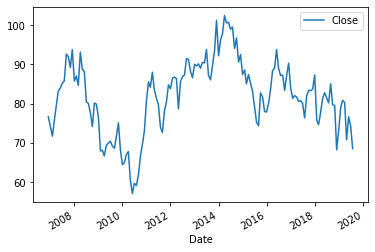

In [6]:
t.investment_data[['Close']].plot()

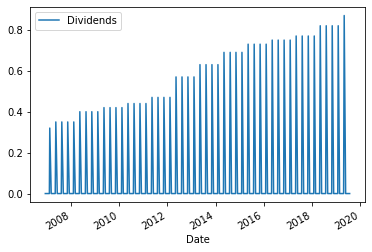

In [7]:
t.investment_data[['Dividends']].plot()